In [1]:

import numpy as np
import pandas as pd
from pathlib import Path
import gc
import itertools
import importlib
from IPython.display import clear_output
import matplotlib.pyplot as plt

# BOKEH
import bokeh.plotting as bk
import bokeh.models as bkmod
import bokeh.layouts as bklay
import bokeh.palettes as bkpalettes
import bokeh.util.hex as bkhex
import bokeh.transform as bktrfm
import bokeh.colors as bkcolors
import BBStudies.Plotting.Bokeh.Tools as bktools
import BBStudies.Plotting.Bokeh.Presets as bkpresets
bk.output_notebook()


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp

# BBStudies
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.XMask.Utils as xutils
import BBStudies.Physics.Constants as cst
import BBStudies.Plotting.Bokeh.Tools as bktools
import BBStudies.Plotting.Bokeh.Presets as bkpresets
import BBStudies.Physics.Base as phys
import BBStudies.Analysis.Footprint as fp
import BBStudies.Physics.Resonances as resn



def plot_phase_space(df,rfbucket = None):
    _FIGS   = {}
    _default_fig_width  = 1400
    _bot_tab_height     = 400
    padding             = 20 
    # Phase space plots:
    #=====================================
    adjustment = 0
    _FIGS['x-px'] = bkpresets.make_scatter_fig(df,xy=('x_sig','px_sig')     ,alpha=0.2,title=f'x norm. phase space ({len(df)} particles)'   ,width=int(_default_fig_width/3.5)+adjustment,height=_bot_tab_height,padding=padding)
    _FIGS['y-py'] = bkpresets.make_scatter_fig(df,xy=('y_sig','py_sig')     ,alpha=0.2,title='y norm. phase space'                          ,width=int(_default_fig_width/3.5),height=_bot_tab_height,padding=padding)
    _FIGS['zeta-pzeta'] = bkpresets.make_scatter_fig(df,xy=('zeta_sig','pzeta_sig') ,alpha=0.2,title='zeta phase space'                             ,width=int(_default_fig_width/3.5),height=_bot_tab_height,padding=padding)

    # _FIGS['x-px'].add_tools(


    _FIGS['x-px'].min_border_left  = padding
    bktools.set_aspect(_FIGS['x-px']       , x_lim=(-11,11),y_lim=(-11,11), aspect=1, margin=padding-adjustment)
    bktools.set_aspect(_FIGS['y-py']       , x_lim=(-11,11),y_lim=(-11,11), aspect=1, margin=0)
    bktools.set_aspect(_FIGS['zeta-pzeta'] , x_lim=(-1,1),y_lim=(-1,1), aspect=1, margin=0)

    

    _FIGS['x-px'].xaxis.axis_label = r'$$\tilde x /\sqrt{\varepsilon_{x}}$$'
    _FIGS['x-px'].yaxis.axis_label = r'$$\tilde p_x /\sqrt{\varepsilon_{x}}$$'

    _FIGS['y-py'].xaxis.axis_label = r'$$\tilde y /\sqrt{\varepsilon_{y}}$$'
    _FIGS['y-py'].yaxis.axis_label = r'$$\tilde p_y /\sqrt{\varepsilon_{y}}$$'

    _FIGS['zeta-pzeta'].xaxis.axis_label = r'$$\tilde \zeta /\sqrt{\varepsilon_{\zeta}}$$'
    _FIGS['zeta-pzeta'].yaxis.axis_label = r'$$\tilde p_\zeta /\sqrt{\varepsilon_{\zeta}}$$'

    if rfbucket is not None:
        color = 'lightseagreen'
        ls    = 'solid'
        label = f'RF Bucket'
        for zcut in list(np.linspace(0.001,rfbucket.zeta_max,10)) + [0.09]:
            zeta_vec,delta_vec = rfbucket.invariant(zcut,npoints = 1000)

            if zcut == 0.09:
                color = 'mediumvioletred'
                ls    = 'dotted'
                label = f'1 σ'
            
            line_top = _FIGS['zeta-pzeta'].line(x=zeta_vec,y=delta_vec, line_width=2, color=color, alpha=0.2, line_dash=ls, legend_label=label)
            line_bot = _FIGS['zeta-pzeta'].line(x=zeta_vec,y=-delta_vec, line_width=2, color=color, alpha=0.2, line_dash=ls, legend_label=label)
            line_top.level = 'underlay'
            line_bot.level = 'underlay'
            # plt.plot(zeta_vec,delta_vec,'-',color='C2')
            # plt.plot(zeta_vec,-delta_vec,'-',color='C2')
    


    grid = bklay.gridplot([[_FIGS['x-px'] ,_FIGS['y-py'] ,_FIGS['zeta-pzeta']]],toolbar_location='right')
    #=====================================
    return grid

Loading BokehJS ...

---
# Loading data
---

In [42]:

partition_ID    = None#'00'

# tbt_path   = 'tracking/coupling_study/FULL/TEST_NO_OCTU_XPLANE_ZETA_2'
tbt_path   = 'tracking/coupling_study/FULL/TEST_BUNCH_0220_XPLANE_ZETA_0'
tracked    = xPlus.Tracking_Interface.from_parquet(tbt_path  ,partition_name='CHUNK',partition_ID=partition_ID)
# data

---
# Inspecting data
---

In [10]:
phase_space = plot_phase_space(tracked.coord_sig)
bk.show(phase_space)

/var/folders/yf/hpn77ycx7h50r6rt81q7lghr0000gn/T/ipykernel_80682/1491007793.py:93: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  grid = bklay.gridplot([[_FIGS['x-px'] ,_FIGS['y-py'] ,_FIGS['zeta-pzeta']]],toolbar_location='right')
/var/folders/yf/hpn77ycx7h50r6rt81q7lghr0000gn/T/ipykernel_80682/1491007793.py:93: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  grid = bklay.gridplot([[_FIGS['x-px'] ,_FIGS['y-py'] ,_FIGS['zeta-pzeta']]],toolbar_location='right')


---
# Plotting
---

In [44]:
particle

,CHUNK,turn,particle,state,at_element,x_sig,px_sig,y_sig,py_sig,zeta_sig,pzeta_sig
199000,0,0,19900,1,0,9.936741,-1.123024,1.822269e-16,1.019910e-16,-0.000006,-0.002812
199001,0,1,19900,1,0,-4.845971,-8.946632,4.867001e-01,-1.922025e-02,0.000030,-0.002812
199002,0,2,19900,1,0,-6.721511,8.298676,-3.457902e-01,-2.823367e-01,0.000064,-0.002809
199003,0,3,19900,1,0,9.797688,2.640365,-1.302974e-01,4.975014e-01,0.000100,-0.002809
199004,0,4,19900,1,0,-1.690869,-10.096578,1.158404e+00,-1.117005e-01,0.000136,-0.002809
...,...,...,...,...,...,...,...,...,...,...,...
399995,1,1995,19900,1,0,4.978899,7.040999,-1.305050e+00,7.594689e-01,-0.002944,0.000675
399996,1,1996,19900,1,0,4.214245,-7.427716,9.792096e-01,1.083535e+00,-0.002951,0.000638
399997,1,1997,19900,1,0,-8.422956,-0.769987,6.285733e-01,-1.412822e+00,-0.002956,0.000606
399998,1,1998,19900,1,0,2.040117,8.200851,-1.592178e+00,1.179634e-01,-0.002962,0.000571


Text(0, 0.5, '$J_x$')

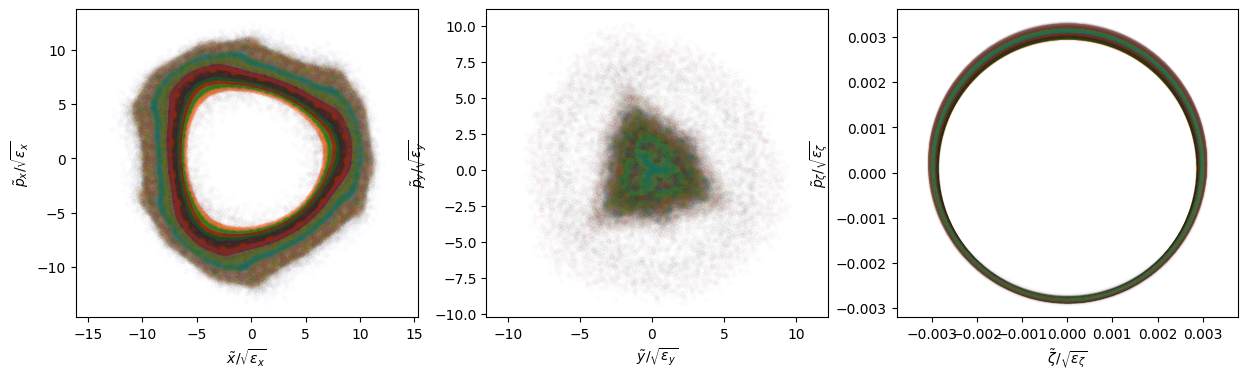

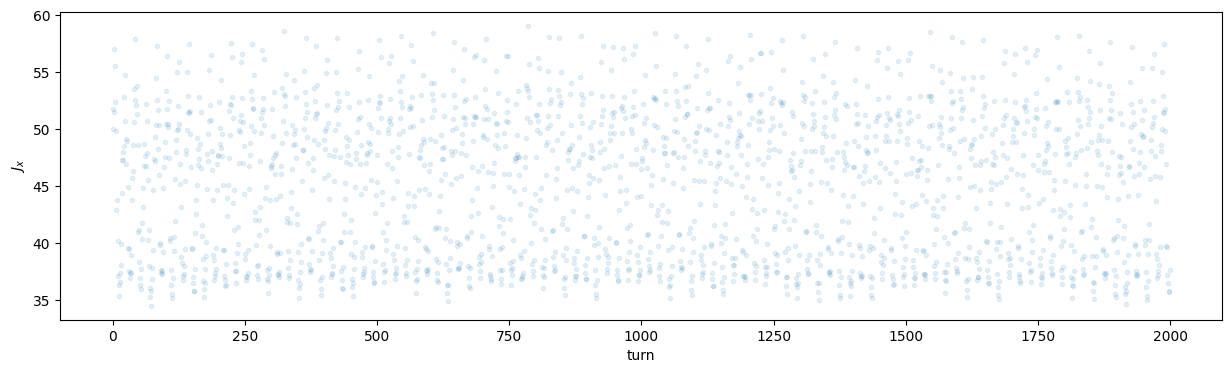

In [43]:


part_idx = 17100

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for df in [tracked.df_sig]:#,data_1.df_sig,data_2.df_sig]:

    for part_idx in df.particle.unique()[100:200]:
        particle = df.groupby('particle').get_group(part_idx)
        
        # Plotting Here
        for plane,ax in zip(['x','y','zeta'],axes):
            plt.sca(ax)
            plt.plot(particle[f'{plane}_sig'],particle[f'p{plane}_sig'],'.',alpha=0.01)


# Adding labels
for plane,ax in zip(['x','y','zeta'],axes):
    plt.sca(ax)
    plt.axis('equal')
    if plane == 'zeta':
        plane = '\zeta'
    plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
    plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')


plt.figure(figsize=(15,4))
plt.plot(particle.turn,0.5*(particle[f'x_sig']**2 + particle[f'px_sig']**2 ),'.',alpha=0.1)
plt.xlabel('turn')
plt.ylabel(r'$J_x$')

In [ ]:
import sys
sys.path.append
from PySUSSIX.PySussix import Sussix

import sys
import pandas as pd

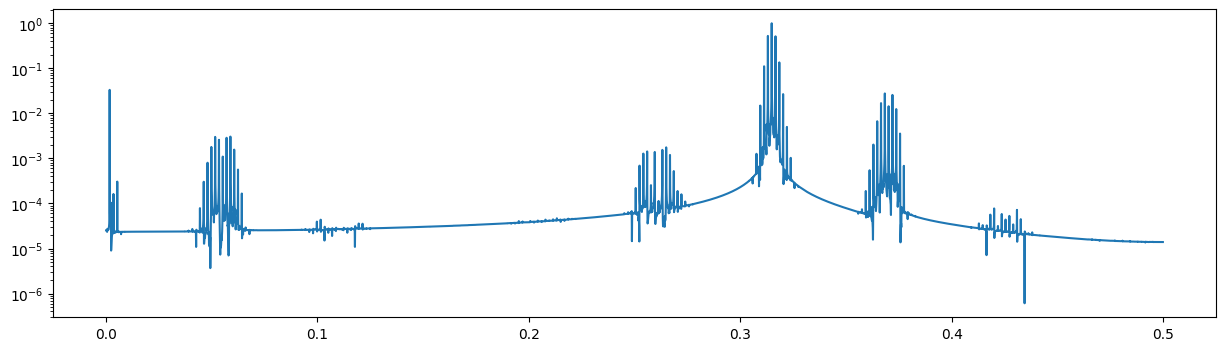

In [44]:


def get_FFT(x):
    x     = np.array(x)
    turns = np.arange(1,len(x)+1)

    freq  = np.fft.fftfreq(turns.shape[-1])
    spectrum = np.fft.fft(x-np.mean(x))

    idx      = np.argmax(np.abs(spectrum))
    Qx       = freq[idx]
    return freq[freq>0],np.abs(spectrum)[freq>0]

import NAFFlib
def NAFFlib_tune(x,nfreqs = 1,Hann_order=2):

    x        = np.array(x)
    Q,Ap,An  = NAFFlib.get_tunes(x-np.mean(x), nfreqs, Hann_order)
    return Q,np.abs(Ap)

particle = tracked.df.groupby('particle').get_group(part_idx)
freq,spectrum = get_FFT(particle.x)
Q,A           = NAFFlib_tune(particle.x,nfreqs=5)



plt.figure(figsize=(15,4))
plt.plot(freq,spectrum/np.max(spectrum),'-')
# plt.plot(Q,A/np.max(A),'o')
plt.yscale('log')

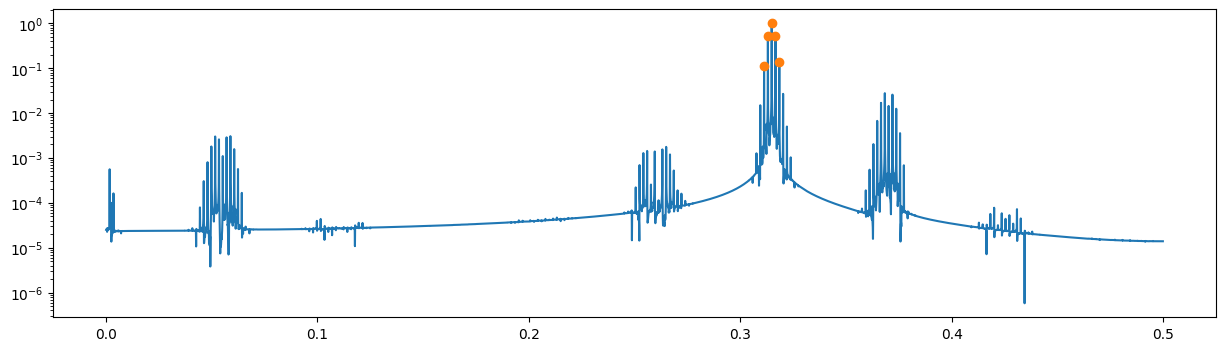

In [18]:


def get_FFT(x):
    x     = np.array(x)
    turns = np.arange(1,len(x)+1)

    freq  = np.fft.fftfreq(turns.shape[-1])
    spectrum = np.fft.fft(x-np.mean(x))

    idx      = np.argmax(np.abs(spectrum))
    Qx       = freq[idx]
    return freq[freq>0],np.abs(spectrum)[freq>0]

import NAFFlib
def NAFFlib_tune(x,nfreqs = 1,Hann_order=2):

    x        = np.array(x)
    Q,Ap,An  = NAFFlib.get_tunes(x-np.mean(x), nfreqs, Hann_order)
    return Q,np.abs(Ap)

particle = tracked.df_sig.groupby('particle').get_group(part_idx)
freq,spectrum = get_FFT(particle.x_sig)
Q,A           = NAFFlib_tune(particle.x_sig,nfreqs=5)



plt.figure(figsize=(15,4))
plt.plot(freq,spectrum/np.max(spectrum),'-')
plt.plot(Q,A/np.max(A),'o')
plt.yscale('log')

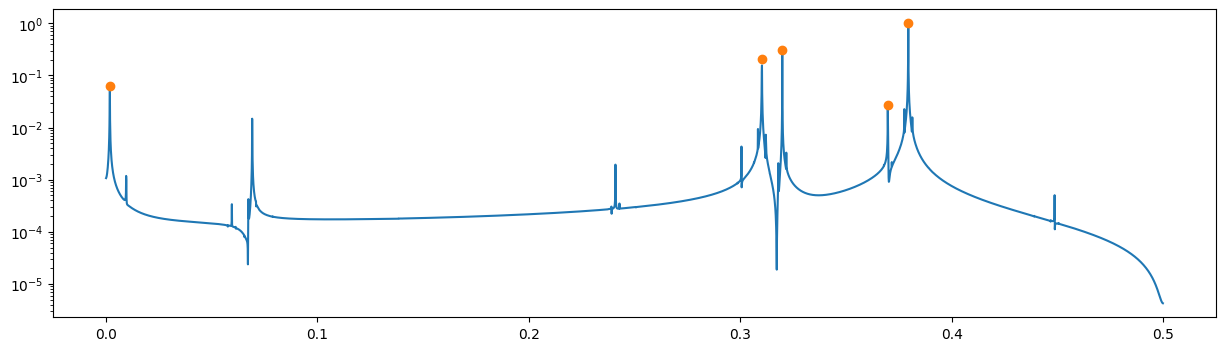

In [51]:


def get_FFT(x):
    x     = np.array(x)
    turns = np.arange(1,len(x)+1)

    freq  = np.fft.fftfreq(turns.shape[-1])
    spectrum = np.fft.fft(x-np.mean(x))

    idx      = np.argmax(np.abs(spectrum))
    Qx       = freq[idx]
    return freq[freq>0],np.abs(spectrum)[freq>0]

import NAFFlib
def NAFFlib_tune(x,nfreqs = 1,Hann_order=2):

    x        = np.array(x)
    Q,Ap,An  = NAFFlib.get_tunes(x-np.mean(x), nfreqs, Hann_order)
    return Q,np.abs(Ap)

particle = tracked.df.groupby('particle').get_group(part_idx)
freq,spectrum = get_FFT(particle.y)
Q,A           = NAFFlib_tune(particle.y,nfreqs=5)



plt.figure(figsize=(15,4))
plt.plot(freq,spectrum/np.max(spectrum),'-')
plt.plot(Q,A/np.max(A),'o')
plt.yscale('log')

In [61]:
particle

,CHUNK,turn,particle,state,at_element,x_sig,px_sig,y_sig,py_sig,zeta_sig,pzeta_sig
170000,0,0,17000,1,0,4.088182,9.126159,1.771112e-19,-9.706779e-21,-0.000017,-0.002796
170001,0,1,17000,1,0,6.731828,-7.174100,6.799402e-03,-7.246261e-03,0.000017,-0.002796
170002,0,2,17000,1,0,-9.361380,-3.626597,-9.540771e-03,-4.595370e-03,0.000053,-0.002795
170003,0,3,17000,1,0,-0.581493,10.146868,1.154321e-02,2.548580e-04,0.000088,-0.002794
170004,0,4,17000,1,0,9.608877,-3.271114,-2.753145e-03,-1.416843e-02,0.000123,-0.002793
...,...,...,...,...,...,...,...,...,...,...,...
1970995,9,9995,17000,1,0,5.947437,8.208935,-3.253178e-03,5.311041e-03,-0.002480,0.001891
1970996,9,9996,17000,1,0,5.042826,-8.521268,1.554127e-02,-8.414889e-03,-0.002501,0.001862
1970997,9,9997,17000,1,0,-9.881402,-1.595344,-1.570277e-02,-1.113381e-02,-0.002520,0.001833
1970998,9,9998,17000,1,0,1.490549,9.893844,7.065010e-03,9.706251e-03,-0.002539,0.001803


In [7]:
fp.NAFFlib_tune(particle.x_sig,nfreqs = 1,Hann_order=2)

0.31025793875090224

In [8]:
fp.NAFFlib_tune(particle.y_sig,nfreqs = 1,Hann_order=2)

0.379484116362755

In [6]:
fp.NAFFlib_tune(particle.x_sig - 1j*particle.px_sig,nfreqs = 1,Hann_order=2)

0.31025793875089835

(-12.0, 12.0)

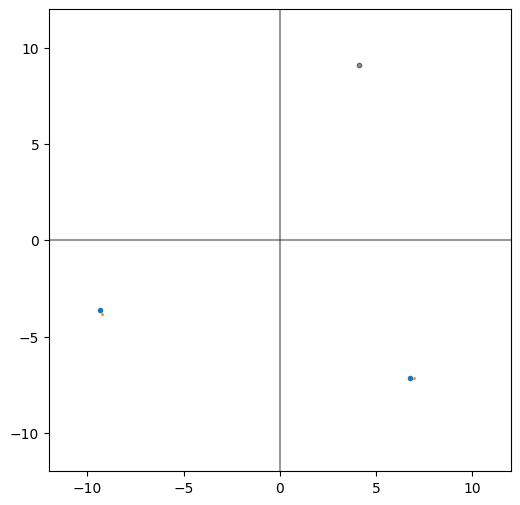

In [165]:
turn_max = 3
x  = particle.x_sig
px = particle.px_sig
N  = np.arange(0,turn_max)

Qx        = fp.NAFFlib_tune(x,nfreqs = 1,Hann_order=2)

Jx        = np.mean(0.5*(x**2 + px**2).values[0])
_,psi0    = phys.cart2pol(x.values[0], px.values[0])
# np.tan(px.values[0]/x.values[0])

hx = np.sqrt(2*Jx)*np.exp(-1j*(2*np.pi*Qx*N - psi0))

plt.figure(figsize=(6,6))
plt.plot(x[:turn_max],px[:turn_max],'.')
plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
plt.xlim([-12,12])
plt.ylim([-12,12])
# plt.axis('equal');

<module 'BBStudies.Physics.Resonances' from '/Users/pbelanger/ABPLocal/BBStudies/BBStudies/Physics/Resonances.py'>

In [187]:
import importlib
importlib.reload(resn)
resonances = resn.resonance_df(3)
resonances[resonances.Order==3]

,ID,Order,a,b,hkpq,slope,y0,x0
0,"(-2, 1, 0, 1)",3,2,1,"(0, 1, 1, 3)",-2.0,0.000000,NaN
1,"(2, 1, 0, 1)",3,2,1,"(0, 1, 1, 3)",2.0,0.000000,NaN
2,"(-1, 2, 0, 1)",3,2,1,"(0, 1, 1, 3)",-0.5,0.000000,NaN
3,"(1, 2, 0, 1)",3,2,1,"(0, 1, 1, 3)",0.5,-0.000000,NaN
4,"(1, 2, 1, 1)",3,2,1,"(0, 1, 1, 3)",0.5,1.000000,NaN
5,"(-1, 2, 1, 1)",3,2,1,"(0, 1, 1, 3)",-0.5,1.000000,NaN
12,"(-1, 2, 0, 1)",3,1,2,"(0, 1, 2, 3)",-0.5,0.000000,NaN
13,"(1, 2, 0, 1)",3,1,2,"(0, 1, 2, 3)",0.5,0.000000,NaN
14,"(-2, 1, 0, 1)",3,1,2,"(0, 1, 2, 3)",-2.0,0.000000,NaN
15,"(2, 1, 0, 1)",3,1,2,"(0, 1, 2, 3)",2.0,-0.000000,NaN


In [170]:
resn.Farey(3)


[array([0, 1]), array([1, 3]), array([1, 2]), array([2, 3]), array([1, 1])]

In [178]:
def resonance_df(order):
    ''' Returns a dataframe with the information of resonance lines up to a given order'''
    resonances = []
    nodes      = resn.Farey(int(order))
    for node_i in nodes:
        h, k = node_i            # Node h/k on the axes
        for node_j in nodes:
            p, q = node_j
            b    = float(k * p)  # Resonance line a*Qx + b*Qy = c (linked to p/q)
            if b > 0:
                a, c = float(q - k * p), float(p * h)

                # Resonance lines from a*Qx + b*Qy = c
                # Qy = c/b - a/b*Qx
                # Qy = c/b + a/b*Qx
                # Qx = c/b - a/b*Qy     -> Qy = -(Qx - c/b)*b/a      if a!=0 else Qx = c/b, Qy = [0,1]
                # Qx = c/b + a/b*Qy     -> Qy =  (Qx - c/b)*b/a      if a!=0 else Qx = c/b, Qy = [0,1]
                # Qx = c/b - a/b*(1-Qy) -> Qy =  (Qx - (c-a)/b)*b/a  if a!=0 else Qx = c/b, Qy = [0,1]
                # Qx = c/b + a/b*(1-Qy) -> Qy = -(Qx - (c+a)/b)*b/a  if a!=0 else Qx = c/b, Qy = [0,1]

                if a!=0 :
                    slopes = [-a/b  , a/b, -b/a,  b/a,      b/a,     -b/a]
                    y0s    = [ c/b  , c/b,  c/a, -c/a, -(c-a)/a,  (c+a)/a]
                    x0s    = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan  ]
                else:
                    slopes = [-a/b  ,   a/b, np.inf]
                    y0s    = [ c/b  ,   c/b, np.nan]
                    x0s    = [np.nan,np.nan,    c/b]

                for slope,y0,x0 in zip(slopes,y0s,x0s):
                    
                    # Create unique ID to later eliminate duplicates
                    if slope != np.inf:
                        slope_int = Fraction(str(slope)).limit_denominator(20).as_integer_ratio()
                        y0_int    = Fraction(str(y0)).limit_denominator(20).as_integer_ratio()
                        ID        = slope_int+y0_int
                    else:
                        ID        = (np.inf,np.inf) + Fraction(str(x0)).limit_denominator(20).as_integer_ratio()
                    
                    resonances.append({ 'ID'   :ID,
                                        '(a,b)':(int(a),int(b)),
                                        'Order':int(a+b),
                                        'slope':slope,
                                        'y0'   :y0,
                                        'x0'   :x0})

            if q == k and p == 1: 
                break

    resonances = pd.DataFrame(resonances)
    resonances = resonances.drop_duplicates(subset='ID').reset_index(drop=True)
    return resonances

resonance_df(3)

NameError: name 'Fraction' is not defined

In [186]:
from fractions import Fraction

order = 3
# Create array of (value,numerator,denominator)
allFracts  = [(0,0,1)] + [(m/k,)+Fraction(f'{m}/{k}').as_integer_ratio() for k in range(1, order+1) for m in range(1, k+1)]
# uniqueFraq = np.array(list(set(allFracts)))
# sort by value (1st columns) and return
# list(uniqueFraq[np.argsort(uniqueFraq[:,0]),1:].astype(int))
allFracts

[(0, 0, 1),
 (1.0, 1, 1),
 (0.5, 1, 2),
 (1.0, 1, 1),
 (0.3333333333333333, 1, 3),
 (0.6666666666666666, 2, 3),
 (1.0, 1, 1)]